## Monte Carlo Epsilon Greedy

1. Motivation
   
The drawback of exploring starts is that the policy is deterministic. As observed in the previous experiment, the lack of exploration can result in the action value not being updated over two iterations (potentially yielding zero or negative values, which may result in selecting zero as the maximum). Therefore, we need to find a balance between efficient data utilization and exploration.

2. Method

To address the limitations of selecting the action with the maximum action value as the policy, it's important to allow for the possibility of other actions. This can be done using an epsilon-greedy strategy, which is a common approach in reinforcement learning. The policy is defined as follows:
$$
\pi(a \vert s)= \begin{cases} 1-\frac{\epsilon}{\vert{A(s)}\vert}({\vert{A(s)}\vert} - 1), & \text {for the greedy action} \\\\ \frac{\epsilon}{\vert{A(s)}\vert}, & \text{for the other ${\vert{A(s)}\vert} - 1$  actions} \end{cases}
$$
In this formula:
- ϵ is a small positive constant representing the exploration probability.
- | A(s) | is the number of possible actions in state ss.

3. Remark

In the video, it just takes the epsilon-greedy policy in PI step, but actually I applied it to take action (grid_world.step method) as well.

<img src = 'MC_EpsilonGreedy.png' alt = 'MC_EpsilonGreedy' style="width: 700px; height: 500px;" />

In [1]:
import numpy as np
import random
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from GridWorld import GridWorld

c:\Users\callmest\.conda\envs\RBP-TSTL\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\callmest\.conda\envs\RBP-TSTL\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\callmest\.conda\envs\RBP-TSTL\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
gamma = 0.9 
rows = 10
cols = 10
grid_world = GridWorld(rows, cols, forbiddenAreaNums=10)
grid_world.show()

⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️
⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
🚫⬜️⬜️⬜️✅⬜️⬜️🚫⬜️⬜️
⬜️⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️🚫
🚫⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️⬜️


In [3]:
episode_length = 100

state_values = np.zeros(rows*cols) 

# action value
qtable = np.zeros((rows*cols, 5)) 

# MC Basic method is just like policy iteration, we first need a random policy and then improve it
policy = np.eye(5)[np.random.randint(0,5,size=(rows*cols))]

grid_world.show_policy_matirx(policy)

Now policy:
⬆️⬇️⏪⬆️⬇️➡️🔄⬆️🔄⬇️
⬆️⬅️🔄⏬⬇️🔄⬆️🔄⬅️⬅️
⬇️⏪🔄➡️⬆️⬆️➡️⬅️⬇️🔄
⏫️⬅️⬇️🔄✅🔄⬆️⏬⬇️⬇️
⬅️⬅️⬇️🔄⬇️⬆️➡️➡️⬅️⬆️
➡️🔄⬅️➡️⬆️➡️⬅️⬆️⬇️⏩️
⏫️➡️⬅️⬅️⬇️⬅️⬅️⬅️⬇️⬇️
⬇️⬇️⬆️⬇️⏫️🔄⬅️⬆️⬇️⬇️
🔄➡️➡️➡️⬇️⬆️🔄🔄⬆️⬇️
⬇️➡️⏪⬅️⬆️⬅️⬆️⬆️⬅️⬇️


inital epsilon: 0.2
-----------------------------------
q value update start at iteration: 0, threshold: [500.0]
soft policy: greedy action prob: 0.84, other action prob: 0.04000000000000001
-----------------------------------
q value update start at iteration: 1, threshold: [0.0]
soft policy: greedy action prob: 0.84, other action prob: 0.04000000000000001
-----------------------------------
q value update start at iteration: 2, threshold: [988.395233336689]
soft policy: greedy action prob: 0.84, other action prob: 0.04000000000000001
-----------------------------------
q value update start at iteration: 3, threshold: [345.85628239025783]
soft policy: greedy action prob: 0.84, other action prob: 0.04000000000000001
-----------------------------------
q value update start at iteration: 4, threshold: [377.4986854563669]
soft policy: greedy action prob: 0.84, other action prob: 0.04000000000000001
-----------------------------------
q value update start at iteration: 5, threshold: [298.8

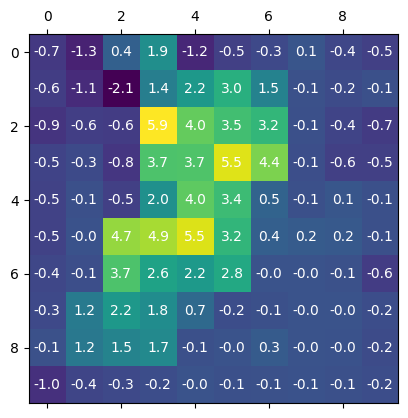

In [4]:

epsilon = 0.2
print(f'inital epsilon: {epsilon}')

cut = 0
cut_threshold = 5000
threshold = 0.001
pre_qtabel = qtable.copy() + 1 


while cut < cut_threshold:
    print('-----------------------------------')
    print(f'q value update start at iteration: {cut}, threshold: [{np.sum((pre_qtabel-qtable)**2)}]')
    pre_qtabel = qtable.copy()


    # start from a random state and action
    now_state = random.randint(0, rows*cols - 1)
    now_action = random.randint(0, 4)

    # generate a episode
    episode = grid_world.get_episode_return(
        now_state=now_state,
        now_action=now_action,
        policy=policy,
        steps=episode_length
    )

    last_reward = episode[-1][2]

    # PE
    for k in range(episode_length - 1, -1, -1):
        # obtain the state, action, reward of each step
        now_state, now_action, now_reward, _, _ = episode[k]
        last_reward = now_reward + gamma * last_reward
        # update the qtable using the every-visit method
        qtable[now_state][now_action] = last_reward

    # updated policy accordding to the epsilon-greedy policy
    policy = np.eye(5)[np.argmax(qtable,axis=1)]
    greedy_action_p = 1 - (epsilon * (4/5))
    other_action_p = epsilon * (1/5)
    print(f'soft policy: greedy action prob: {greedy_action_p}, other action prob: {other_action_p}')
    decision = {1:greedy_action_p, 0:other_action_p}
    # replace the prob with the epsilon-greedy policy
    policy = np.vectorize(decision.get)(policy)

    cut += 1

print('Optimal Policy Found!')
grid_world.show_policy_matirx(policy)
state_values = np.sum(policy * qtable, axis=1).reshape(rows, cols)
grid_world.show_state_value(state_values)